<a href="https://colab.research.google.com/github/mohamedtal/PFE2021/blob/main/06_04_2021_TransformerArchitecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import os
import random
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.python.keras import Model
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras import layers
from keras.applications.resnet50 import ResNet50
from keras.applications import DenseNet121
from keras.utils import Sequence
from keras.layers import Dense, Dropout, Flatten, Input, ZeroPadding2D, GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras import regularizers
from keras.models import Model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras import optimizers
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import tensorflow as tf

In [2]:
!pip install -U tensorflow-addons

     |████████████████████████████████| 706kB 7.4MB/s 


In [14]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
import glob, warnings
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [4]:
# before all don't forget to use the GPU

# at first we need to get the dataset from the drive 
# pfe2021.1@gmail.com		zakimoha123
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [8]:
#unzip the dataset
!unzip /content/drive/MyDrive/dataset/DR-500-100-100-preProcessing1.zip

Archive:  /content/drive/MyDrive/dataset/DR-500-100-100-preProcessing1.zip
   creating: DR-preprocessing1/
   creating: DR-preprocessing1/val/
   creating: DR-preprocessing1/val/2/
  inflating: DR-preprocessing1/val/2/20634_right.jpg  
  inflating: DR-preprocessing1/val/2/31876_right.jpg  
  inflating: DR-preprocessing1/val/2/4903_left.jpg  
  inflating: DR-preprocessing1/val/2/7640_left.jpg  
  inflating: DR-preprocessing1/val/2/41453_left.jpg  
  inflating: DR-preprocessing1/val/2/7906_left.jpg  
  inflating: DR-preprocessing1/val/2/9690_right.jpg  
  inflating: DR-preprocessing1/val/2/36732_right.jpg  
  inflating: DR-preprocessing1/val/2/19261_left.jpg  
  inflating: DR-preprocessing1/val/2/15309_right.jpg  
  inflating: DR-preprocessing1/val/2/38215_left.jpg  
  inflating: DR-preprocessing1/val/2/5047_left.jpg  
  inflating: DR-preprocessing1/val/2/25950_right.jpg  
  inflating: DR-preprocessing1/val/2/3932_left.jpg  
  inflating: DR-preprocessing1/val/2/22687_right.jpg  
  inflat

# data preprocessing and augmentation

In [4]:
!rm -r DR-500-100-100/

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt

path = 'DR-500-100-100/train/'
for c in range(5):
  new_path = path + str(c)
  list_images =  os.listdir(new_path)
  for img in list_images:
    image = cv2.imread(new_path+'/'+img)
    image = np.expand_dims(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 0)

    data_generator = keras.preprocessing.image.ImageDataGenerator(zoom_range=0.15,rotation_range=0,fill_mode='constant')
    data_generator.fit(image)

    dir_It = data_generator.flow(
        image,
        batch_size=1,
        save_to_dir=new_path,
        save_prefix="",
        save_format='png',
    )

    for _ in range(2):
        img = dir_It.next()

In [6]:
# augmenttaion
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib
import os
import cv2
from google.colab.patches import cv2_imshow
%matplotlib inline

for i in range(5):
  BASE_DIR = "DR-500-100-100/train/"+str(i)
  NEW_DIR= "DR-500-100-100/train/"+str(i)
  
  list_dir =  os.listdir(BASE_DIR)
  for images in list_dir:
      image = cv2.imread(BASE_DIR + "/"+ images)
      #image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
          # rotation

      #zoom
      crop = iaa.Crop(percent=(0.09)) # crop image
      corp_image=crop.augment_image(image)
      cv2.imwrite(NEW_DIR + "/" + 'zoomed-'+images,corp_image)

      crop = iaa.Crop(percent=(0.12)) # crop image
      corp_image=crop.augment_image(image)
      cv2.imwrite(NEW_DIR + "/" + 'zoomed1-'+images,corp_image)

      crop = iaa.Affine(shear=3)
      corp_image=crop.augment_image(image)
      cv2.imwrite(NEW_DIR + "/" + 'affine-'+images,corp_image)

      crop = iaa.Affine(shear=-3)
      corp_image=crop.augment_image(image)
      cv2.imwrite(NEW_DIR + "/" + 'affine1-'+images,corp_image)


# read data

In [7]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      zoom_range=0.15,
      rotation_range=0,
      fill_mode='constant'
      ) 

train_generator = train_datagen.flow_from_directory(
    'DR-500-100-100/train',
    classes = ['0','1','2','3','4'],
    target_size=(1024, 1024),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    shuffle=True)

# ******* for validation dataset
val_datagen = ImageDataGenerator(
      rescale=1./255,
      ) 

val_generator = val_datagen.flow_from_directory(
    'DR-500-100-100/val',
    classes = ['0','1','2','3','4'],
    target_size=(1024, 1024),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical')

# ******* for test dataset
test_datagen = ImageDataGenerator(
      rescale=1./255,
      ) 

test_generator = test_datagen.flow_from_directory(
    'DR-500-100-100/test',
    classes = ['0','1','2','3','4'],
    target_size=(1024, 1024),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical')

Found 12500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [ ]:
#x_test, y_test = next(test_generator)
#x_train, y_train = next(train_generator)
#x_val, y_val = next(val_generator)

In [ ]:
#print(x_train.shape,y_train.shape)
#print(x_test.shape,y_test.shape)
#print(x_val.shape,y_val.shape)

(1000, 1024, 1024, 3) (1000, 5)


#starting the training

In [8]:
num_classes = 5
input_shape = (1024, 1024, 3)

learning_rate = 0.001
weight_decay = 0.0001
batch_size = 32
num_epochs = 100
image_size = 1024  # We'll resize input images to this size
patch_size = 255  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier


In [8]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(factor=0.02),
        layers.experimental.preprocessing.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
#data_augmentation.layers[0].adapt(x_train)

In [9]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [10]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image)
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy())
    plt.axis("off")

In [11]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [12]:
def create_vit_classifier():

    inputs = layers.Input(shape=input_shape)
    # Augment data.
    #augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(inputs)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(5)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model


In [13]:
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit_generator(
        train_generator,
        validation_data = val_generator,
        epochs=num_epochs,
        callbacks=[checkpoint_callback],
        verbose = 1
    )

    model.load_weights(checkpoint_filepath)
    model.evaluate(test_generator)
    

    return history


vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
391/391 [==============================] - 2270s 6s/step - loss: 8.9525 - accuracy: 0.1995 - val_loss: 9.6709 - val_accuracy: 0.2000
Epoch 2/100
 58/391 [===>..........................] - ETA: 31:54 - loss: 9.3316 - accuracy: 0.1969

KeyboardInterrupt: ignored

# new implementation

In [11]:
path_train = '/content/DR-preprocessing1/train'
path_test = '/content/DR-preprocessing1/test'
path_val = '/content/DR-preprocessing1/val'

IMAGE_SIZE = 224
BATCH_SIZE = 16
EPOCHS = 10

In [9]:
def data_augment(image):
    p_spatial = tf.random.uniform([], 0, 1.0, dtype = tf.float32)
    p_rotate = tf.random.uniform([], 0, 1.0, dtype = tf.float32)
    p_pixel_1 = tf.random.uniform([], 0, 1.0, dtype = tf.float32)
    p_pixel_2 = tf.random.uniform([], 0, 1.0, dtype = tf.float32)
    p_pixel_3 = tf.random.uniform([], 0, 1.0, dtype = tf.float32)
    
    # Flips
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    
    if p_spatial > .75:
        image = tf.image.transpose(image)
        
    # Rotates
    if p_rotate > .75:
        image = tf.image.rot90(image, k = 3) # rotate 270º
    elif p_rotate > .5:
        image = tf.image.rot90(image, k = 2) # rotate 180º
    elif p_rotate > .25:
        image = tf.image.rot90(image, k = 1) # rotate 90º
        
    # Pixel-level transforms
    if p_pixel_1 >= .4:
        image = tf.image.random_saturation(image, lower = .7, upper = 1.3)
    if p_pixel_2 >= .4:
        image = tf.image.random_contrast(image, lower = .8, upper = 1.2)
    if p_pixel_3 >= .4:
        image = tf.image.random_brightness(image, max_delta = .1)
        
    return image

In [12]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                          samplewise_center = True,
                                                          samplewise_std_normalization = True,
                                                          preprocessing_function = data_augment)

train_generator = datagen.flow_from_directory(
    path_train,
    batch_size = BATCH_SIZE,
    seed = 1,
    color_mode = 'rgb',
    shuffle = True,
    class_mode = 'categorical',
    target_size = (IMAGE_SIZE, IMAGE_SIZE))

# ******* for validation dataset


val_generator = datagen.flow_from_directory(
    path_val,
    batch_size = BATCH_SIZE,
    seed = 1,
    color_mode = 'rgb',
    shuffle = False,
    class_mode = 'categorical',
    target_size = (IMAGE_SIZE, IMAGE_SIZE))

# ******* for test dataset

test_generator = datagen.flow_from_directory(
    path_test,
    batch_size = BATCH_SIZE,
    seed = 1,
    color_mode = 'rgb',
    shuffle = False,
    target_size = (IMAGE_SIZE, IMAGE_SIZE))




Found 2500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

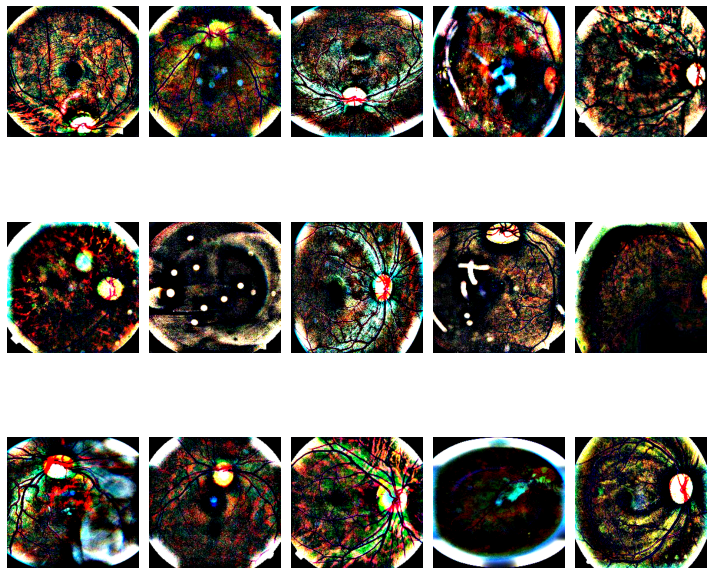

In [15]:
images = [train_generator[0][0][i] for i in range(16)]
fig, axes = plt.subplots(3, 5, figsize = (10, 10))

axes = axes.flatten()

for img, ax in zip(images, axes):
    ax.imshow(img.reshape(IMAGE_SIZE, IMAGE_SIZE, 3))
    ax.axis('off')

plt.tight_layout()
plt.show()

In [16]:
!pip install --quiet vit-keras

from vit_keras import vit

In [25]:
vit_model = vit.vit_b32(
        image_size = IMAGE_SIZE,
        activation = 'softmax',
        pretrained = False,
        include_top = False,
        pretrained_top = False,
        classes = 5)
for layer in vit_model.layers:
  layer.trainable = False
  
for layer in vit_model.layers:
  print(layer,layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f1ccabe8ed0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f1ccabe8fd0> False
<tensorflow.python.keras.layers.core.Reshape object at 0x7f1ccac00f10> False
<vit_keras.layers.ClassToken object at 0x7f1ccac00b10> False
<vit_keras.layers.AddPositionEmbs object at 0x7f1ccac00fd0> False
<vit_keras.layers.TransformerBlock object at 0x7f1ccabe8650> False
<vit_keras.layers.TransformerBlock object at 0x7f1ccabb7f90> False
<vit_keras.layers.TransformerBlock object at 0x7f1ccaaaf890> False
<vit_keras.layers.TransformerBlock object at 0x7f1ccaa4aa50> False
<vit_keras.layers.TransformerBlock object at 0x7f1cca9a9290> False
<vit_keras.layers.TransformerBlock object at 0x7f1cca92b910> False
<vit_keras.layers.TransformerBlock object at 0x7f1ccab66ad0> False
<vit_keras.layers.TransformerBlock object at 0x7f1cca836090> False
<vit_keras.layers.TransformerBlock object at 0x7f1cca894390> False
<vit_keras.layers.Tra

In [ ]:
from vit_keras import visualize

x = test_generator.next()
image = x[0]

attention_map = visualize.attention_map(model = vit_model, image = image)

# Plot results
fig, (ax1, ax2) = plt.subplots(ncols = 2)
ax1.axis('off')
ax2.axis('off')
ax1.set_title('Original')
ax2.set_title('Attention Map')
_ = ax1.imshow(image)
_ = ax2.imshow(attention_map)

In [26]:
model = tf.keras.Sequential([
        vit_model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(11, activation = tfa.activations.gelu),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(5, 'softmax')
    ],
    name = 'vision_transformer')

model.summary()

Model: "vision_transformer"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vit-b32 (Functional)         (None, 768)               87455232  
_________________________________________________________________
flatten_2 (Flatten)          (None, 768)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 768)               3072      
_________________________________________________________________
dense_4 (Dense)              (None, 11)                8459      
_________________________________________________________________
batch_normalization_5 (Batch (None, 11)                44        
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 60        
Total params: 87,466,867
Trainable params: 10,077
Non-trainable params: 87,456,790
_______________________________

/usr/local/lib/python3.7/dist-packages/tensorflow_addons/activations/gelu.py:81: UserWarning: Default value of `approximate` is changed from `True` to `False`
  "Default value of `approximate` is changed from `True` to `False`"


In [ ]:
learning_rate = 1e-4

optimizer = tfa.optimizers.RectifiedAdam(learning_rate = learning_rate)

model.compile(optimizer = optimizer, 
              loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing = 0.2), 
              metrics = ['accuracy'])

STEP_SIZE_TRAIN = train_generator.n // train_generator.batch_size
STEP_SIZE_VALID = val_generator.n // val_generator.batch_size

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy',
                                                 factor = 0.2,
                                                 patience = 2,
                                                 verbose = 1,
                                                 min_delta = 1e-4,
                                                 min_lr = 1e-6,
                                                 mode = 'max')

earlystopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                 min_delta = 1e-4,
                                                 patience = 5,
                                                 mode = 'max',
                                                 restore_best_weights = True,
                                                 verbose = 1)

checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath = './model.h5',
                                                  monitor = 'val_accuracy', 
                                                  verbose = 1, 
                                                  save_best_only = True,
                                                  save_weights_only = True,
                                                  mode = 'max')

callbacks = [earlystopping, reduce_lr, checkpointer]

model.fit(x = train_generator,
          steps_per_epoch = STEP_SIZE_TRAIN,
          validation_data = val_generator,
          validation_steps = STEP_SIZE_VALID,
          epochs = EPOCHS,
          callbacks = callbacks)

model.save('model.h5', save_weights_only = True)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow_addons/activations/gelu.py:81: UserWarning: Default value of `approximate` is changed from `True` to `False`
  "Default value of `approximate` is changed from `True` to `False`"


156/156 [==============================] - 369s 2s/step - loss: 2.0507 - accuracy: 0.2044 - val_loss: 2.1317 - val_accuracy: 0.2097

Epoch 00001: val_accuracy improved from -inf to 0.20968, saving model to ./model.h5
Epoch 2/10
156/156 [==============================] - 355s 2s/step - loss: 2.0806 - accuracy: 0.1900 - val_loss: 2.0091 - val_accuracy: 0.2177

Epoch 00002: val_accuracy improved from 0.20968 to 0.21774, saving model to ./model.h5
Epoch 3/10
 36/156 [=====>........................] - ETA: 4:10 - loss: 2.0577 - accuracy: 0.1808